In [1]:
from sys import exit
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import watershed, disk
from skimage import data
from skimage.io import imread
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte




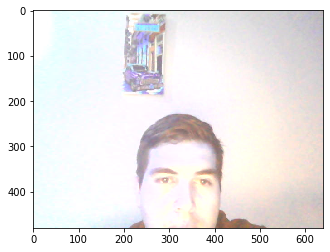

In [2]:
#Programa o codigo que captura la imagen de la camara
device = 0
cam = cv2.VideoCapture(0)
count = 1

# Se hace de forma iterativa hasta que se acaben los frames
while cam.isOpened() and count > 0:
    # Capture frame-by-frame
    ret, frame = cam.read()
    if ret == False:
        print("End of video")
        break;
 
    plt.imshow(frame)
    plt.show()
    count -= 1
 
cam.release()

/home/guille/miniconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


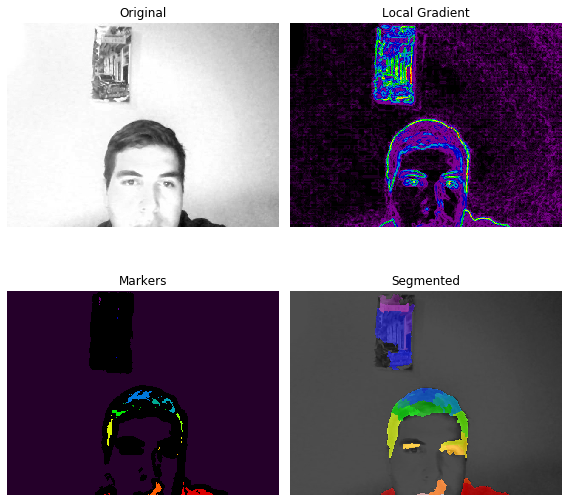

In [3]:
img = frame
img_gray = rgb2gray(img)

image = img_as_ubyte(img_gray)


#Calculate the local gradients of the image
#and only select the points that have a
#gradient value of less than 20
markers = rank.gradient(image, disk(5)) < 20
markers = ndi.label(markers)[0]

gradient = rank.gradient(image, disk(2))

#Watershed Algorithm
labels = watershed(gradient, markers)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()